Used Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels as sm


In [2]:
# Erstellen des DataFrames und der einzelnen Parameter
auswertung_raw = pd.read_csv('SP_Abfrage_020319.txt', delimiter = ';', usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14])
auswertung = auswertung_raw.dropna()
header_arr = auswertung.columns.get_values()
header = header_arr.tolist()
#modvig = auswertung.modvig
#sed = auswertung.sed
#max_v = auswertung.max_v
#hf4 = auswertung.hf4
#hf2 = auswertung.hf2
v2 = auswertung.v2
v4 = auswertung.v4
#max_lac = auswertung.max_lac
#age = auswertung.age
#sex = auswertung.sex
cud_p1_lvf = auswertung.CUD_P1_LVF
cud_n1_lvf = auswertung.CUD_N1_LVF
cud_p1_rvf = auswertung.CUD_P1_RVF
cud_n1_rvf = auswertung.CUD_N1_RVF
enmo = auswertung.ENMO
mvpa_1_100 = auswertung.MVPA_1_100
mvpa_5_100 = auswertung.MVPA_5_100
mvpa_10_100 = auswertung.MVPA_10_100
age = auswertung.age
mass = auswertung.mass
auswertung['height'] = auswertung.height/100
height_sqr = auswertung.height**2
auswertung['bmi'] = round(mass/(height_sqr), 2)
auswertung['rel_pa'] = round(mvpa_1_100 / auswertung.bmi, 2)

#print(auswertung.info())
print(auswertung)


    CUD_N1_LVF  CUD_N1_RVF  CUD_P1_LVF  CUD_P1_RVF    v2    v4   ENMO  \
0        38.06       33.18       46.85       55.63  1.80  1.96  26.74   
1        38.06       39.04       65.39       49.78  2.63  3.05  28.60   
2        37.09       31.23       38.06       61.49  1.78  1.92  19.57   
3        86.86      114.19       76.13       71.25  1.69  1.99  20.87   
4        90.77       40.99       82.96       76.13  1.51  1.74  21.83   
5        81.01       85.89       69.30       66.37  1.87  2.20  21.36   
6         4.88       44.90       13.66       43.92  2.62  2.91  35.10   
7        -4.88       49.78        0.98       40.02  1.49  1.71  27.25   
8        34.16       -3.90       28.30      -17.57  1.79  1.95  36.62   
10       66.37       80.03       93.70       81.98  1.81  2.01  37.36   
11       71.25       64.42       87.84       69.30  1.52  1.88  26.35   
12       77.10       77.10       81.98       83.94  2.37  2.81  31.72   
13       30.26       40.99       54.66       63.44 

C:\Users\AgeGain_2\Miniconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\AgeGain_2\Miniconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\AgeGain_2\Miniconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [34]:
auswertung.describe()


,CUD_N1_LVF,CUD_N1_RVF,CUD_P1_LVF,CUD_P1_RVF,v2,v4,ENMO,MVPA_1_100,MVPA_5_100,MVPA_10_100,age,mass,height,bmi,rel_pa
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,42.633182,49.065909,51.018182,54.080000,1.909545,2.239545,29.236364,47.319091,26.347727,16.868636,64.954545,77.545455,1.735909,25.739545,1.861364
std,26.957725,28.110034,31.356964,27.633417,0.342157,0.450581,7.120016,25.299672,19.806825,14.141337,2.919186,9.615104,0.099793,2.669932,1.028074
min,-4.880000,-3.900000,0.980000,-17.570000,1.490000,1.710000,18.270000,14.190000,2.700000,0.000000,61.000000,54.000000,1.530000,21.630000,0.500000
25%,28.300000,31.717500,20.252500,40.995000,1.702500,1.950000,25.940000,23.537500,10.510000,4.900000,64.000000,71.000000,1.680000,23.435000,1.015000
50%,37.575000,46.850000,52.705000,62.465000,1.800000,2.000000,27.710000,42.960000,20.535000,11.960000,65.000000,80.000000,1.760000,25.855000,1.675000
75%,64.172500,63.687500,80.517500,71.250000,2.117500,2.710000,34.150000,69.252500,43.115000,25.617500,65.000000,84.000000,1.797500,27.080000,2.587500
max,90.770000,114.190000,93.700000,87.840000,2.630000,3.050000,47.560000,87.300000,70.160000,44.150000,72.000000,89.000000,1.920000,31.230000,3.750000


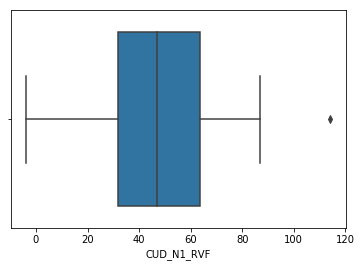

In [33]:
sns.boxplot(x = cud_n1_rvf)

In [29]:
outliers=[]

def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(cud_p1_rvf)
print(outlier_datapoints)

[-17.57, 0.0]


In [18]:
# statistics
n = len(auswertung)
print("Anzahl Probanden: " + str(n))

# mean und standard derivation
def mean_std(array):
    mean = np.mean(array)
    std = np.std(array)
    print("Durchschnitt: {}".format(mean))
    print("Standardabweichung: {}".format(std))


#Histogram für Normalverteilung
def normal_dist(array, title='', xlabel='', ylabel=''):
    maximum = (max(array))
    minimum = (min(array))
    bins = n
    rge = (minimum, maximum)
    plt.hist(array, range = (rge))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Anzahl Probanden: 22
Durchschnitt: 49.065909090909095
Standardabweichung: 27.46373950884907


Berechnung wird durchgeführt für: CUD_N1_LVF, MVPA_1_100
Mindestens ein Parameter ist nicht normal verteilt!
CUD_N1_LVF: p = 0.459
MVPA_1_100: p = 0.044
r-squared: 0.283648


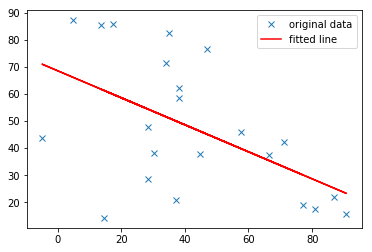

r = -0.495, p = 0.019
Die Korrelation ist signifikant!


In [38]:
## Linear Regression
def linear_regr(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("r-squared: %f" % r_value**2)
    plt.plot(x, y, 'x', label='original data')
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.legend()
    plt.show()
    
    
#Spearman, Pearson = linear Regression
def correlation(parameter1, parameter2):
    norm = shapiro(parameter1, parameter2)
    linear_regr(parameter1, parameter2)
    if norm == True:
        r, pval = stats.pearsonr(parameter1, parameter2)
        print("r = {}, p = {}".format(round(r,3), round(pval,3)))
        if pval < 0.05:
            print("Die Korrelation ist signifikant!")
        else:
            print("Es liegt kein signifikanter Zusammenhang vor!")
    else:
        r, pval = stats.spearmanr(parameter1, parameter2)
        print("r = {}, p = {}".format(round(r, 3), round(pval, 3)))
        if pval < 0.05:
            print("Die Korrelation ist signifikant!")
        else:
            print("Es liegt kein signifikanter Zusammenhang vor!")

correlation(cud_n1_lvf, mvpa_1_100)

Berechnung wird durchgeführt für: CUD_N1_LVF, MVPA_1_100
Mindestens ein Parameter ist nicht normal verteilt!
CUD_N1_LVF: p = 0.459
MVPA_1_100: p = 0.044
R: -0.533, Standard Error of Estimate: 20.921


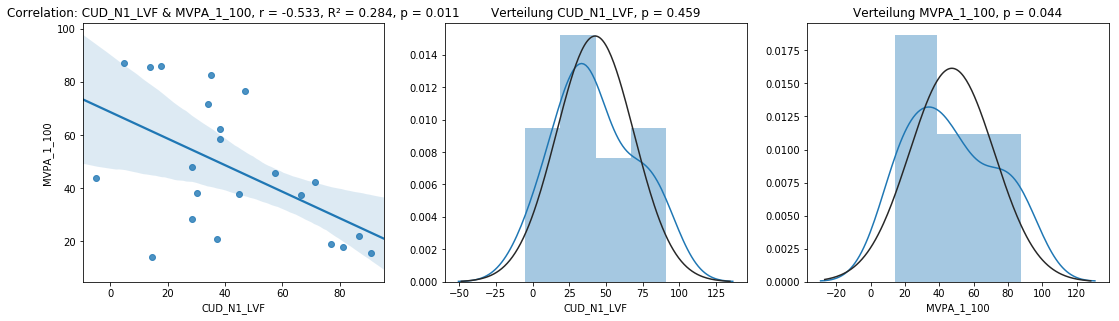

In [37]:
# Distribution Test Shapiro
# H0 = Normalverteilung wird angenommen p > 0.05
# H1 = keine Normalverteilung p < 0.05
def shapiro(parameter1, parameter2):
    name1 = parameter1.name
    name2 = parameter2.name
    statval1, pval1 = stats.shapiro(parameter1)
    statval2, pval2 = stats.shapiro(parameter2)
    print("Berechnung wird durchgeführt für: " + name1 + ", " + name2)
    if pval1 > 0.05 and pval2 > 0.05:
        print("Beide Parameter sind normal verteilt!")
        print("{}: p = {}".format(name1, round(pval1, 3)))
        print("{}: p = {}".format(name2, round(pval2, 3)))
        return True
    else:
        print("Mindestens ein Parameter ist nicht normal verteilt!")
        print("{}: p = {}".format(name1, round(pval1, 3)))
        print("{}: p = {}".format(name2, round(pval2, 3)))
        return False

def plot_corr(var1, var2):
    sd_var2 = np.std(var2)  # Standard Deviation of Variable 2, for SEE calculation
    shapiro(var1,var2)
    statval1, pval1 = stats.shapiro(var1)
    statval2, pval2 = stats.shapiro(var2)
    r, pval_corr = stats.pearsonr(var1, var2)
    se_e = sd_var2*(np.sqrt(1-r**2))  # standard error of estimate calculation (se = sy * sqrt(r**2))
    print('R: {}, Standard Error of Estimate: {}'.format(round(r, 3), round(se_e, 3)))
    fig = plt.figure()

    plt.subplots_adjust(left = 0.125, right = 2.5, bottom = 0.1, top = 1, wspace = 0.2, hspace = 0.3)
    
    ax = fig.add_subplot(1,3,1)
    plt.title('Correlation: {} & {}, r = {}, R² = {}, p = {}'.format(var1.name, var2.name, round(r,3), round(r**2, 3), round(pval_corr, 3)))
    sns.regplot(var1, var2)
    
    ax = fig.add_subplot(1,3,2)
    plt.title('Verteilung {}, p = {}'.format(var1.name, round(pval1, 3)))
    sns.distplot(var1, fit = stats.norm)

    ax = fig.add_subplot(1,3,3)
    plt.title('Verteilung {}, p = {}'.format(var2.name, round(pval2, 3)))
    sns.distplot(var2, fit = stats.norm)
    
plot_corr(cud_n1_lvf, mvpa_1_100)

In [4]:
"""
Partial Correlation in Python (clone of Matlab's partialcorr)

This uses the linear regression approach to compute the partial 
correlation (might be slow for a huge number of variables). The 
algorithm is detailed here:

    http://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression

Taking X and Y two variables of interest and Z the matrix with all the variable minus {X, Y},
the algorithm can be summarized as

    1) perform a normal linear least-squares regression with X as the target and Z as the predictor
    2) calculate the residuals in Step #1
    3) perform a normal linear least-squares regression with Y as the target and Z as the predictor
    4) calculate the residuals in Step #3
    5) calculate the correlation coefficient between the residuals from Steps #2 and #4; 

    The result is the partial correlation between X and Y while controlling for the effect of Z


Date: Nov 2014
Author: Fabian Pedregosa-Izquierdo, f@bianp.net
Testing: Valentina Borghesani, valentinaborghesani@gmail.com
"""

import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.


    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable


    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

#partial_corr(auswertung)

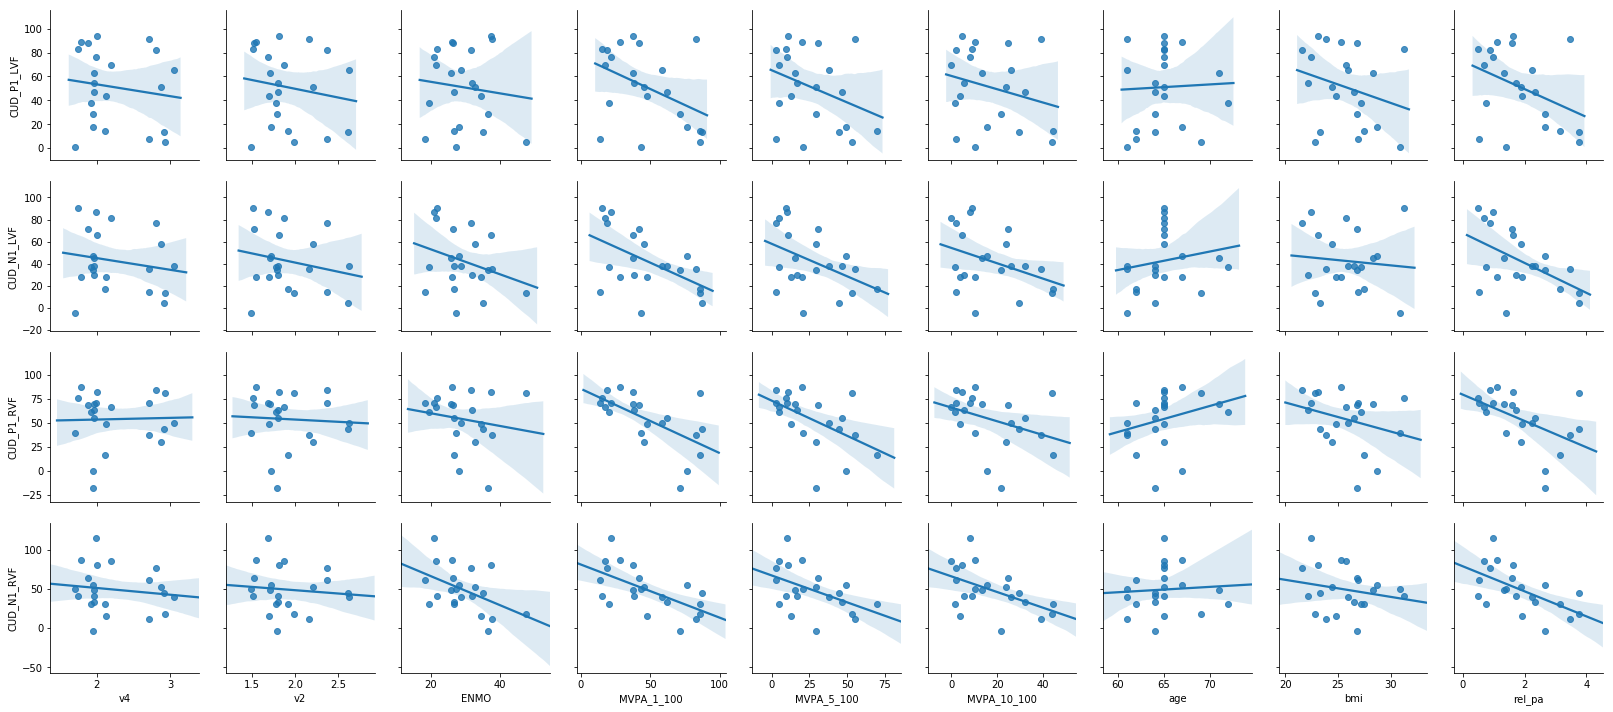

In [8]:
# from https://seaborn.pydata.org/tutorial/axis_grids.html
x_var = ["v4", "v2", "ENMO", "MVPA_1_100", "MVPA_5_100", "MVPA_10_100", "age", "bmi", "rel_pa"]
y_var = ["CUD_P1_LVF", "CUD_N1_LVF", "CUD_P1_RVF", "CUD_N1_RVF"]
reg_plot = sns.pairplot(auswertung, kind = 'reg', diag_kind = 'kde',
                        x_vars = x_var,
                       y_vars = y_var)

reg_plot.savefig("output.png")